In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [16]:
detail = pd.read_csv("description.csv")
detail

,Variable,Description
0,AccountID,account unique identifier
1,Churn,account churn flag (Target)
2,Tenure,Tenure of account
3,City_Tier,Tier of primary customer's city
4,CC_Contacted_L12m,How many times all the customers of the account has contacted customer care in last 12months
5,Payment,Preferred Payment mode of the customers in the account
6,Gender,Gender of the primary customer of the account
7,Service_Score,Satisfaction score given by customers of the account on service provided by company
8,Account_user_count,Number of customers tagged with this account
9,account_segment,Account segmentation on the basis of spend


In [17]:
df = pd.read_csv("train.csv")
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,0,4.0,1.0,11.0,Debit Card,Female,3.0,6.0,Super,1.0,Single,5.0,0.0,23.0,2.0,3.0,187.0,Mobile
1,0,16.0,3.0,18.0,E wallet,Male,3.0,4.0,Super,5.0,NaN,11.0,0.0,16.0,2.0,6.0,179.0,Mobile
2,0,1.0,1.0,9.0,Credit Card,Male,4.0,2.0,Regular Plus,5.0,Single,9.0,0.0,14.0,1.0,2.0,159.0,Mobile
3,0,7.0,3.0,13.0,Cash on Delivery,Male,2.0,3.0,Regular Plus,3.0,Married,1.0,1.0,25.0,3.0,7.0,123.0,Mobile
4,0,4.0,1.0,21.0,Debit Card,Male,2.0,3.0,Regular Plus,2.0,Divorced,4.0,1.0,19.0,1.0,2.0,125.0,Mobile


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9008 entries, 0 to 9007
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    9008 non-null   int64  
 1   Tenure                   8839 non-null   float64
 2   City_Tier                8913 non-null   float64
 3   CC_Contacted_LY          8922 non-null   float64
 4   Payment                  8917 non-null   object 
 5   Gender                   8924 non-null   object 
 6   Service_Score            8932 non-null   float64
 7   Account_user_count       8661 non-null   float64
 8   account_segment          8937 non-null   object 
 9   CC_Agent_Score           8918 non-null   float64
 10  Marital_Status           8836 non-null   object 
 11  rev_per_month            8373 non-null   float64
 12  Complain_ly              8713 non-null   float64
 13  rev_growth_yoy           9005 non-null   float64
 14  coupon_used_for_payment 

In [19]:
df.isnull().sum()


Churn                        0
Tenure                     169
City_Tier                   95
CC_Contacted_LY             86
Payment                     91
Gender                      84
Service_Score               76
Account_user_count         347
account_segment             71
CC_Agent_Score              90
Marital_Status             172
rev_per_month              635
Complain_ly                295
rev_growth_yoy               3
coupon_used_for_payment      2
Day_Since_CC_connect       283
cashback                   379
Login_device               602
dtype: int64

In [20]:
df.describe()


,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,9008.000000,8839.000000,8913.000000,8922.000000,8932.000000,8661.000000,8918.000000,8373.000000,8713.000000,9005.000000,9006.000000,8725.000000,8629.000000
mean,0.168406,11.025229,1.650623,17.861018,2.901142,3.698303,3.054160,6.327123,0.281992,16.212882,1.786587,4.639542,195.621393
std,0.374247,12.822245,0.914061,8.780792,0.722629,1.021064,1.383056,11.747355,0.449995,3.769764,1.957625,3.688796,176.456118
min,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.000000
50%,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.000000
75%,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.000000
max,1.000000,99.000000,3.000000,129.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1991.000000


In [21]:
def unique_value(df):
    print("-----------Unique values in dataframe-----------")
    features = df.columns
    for feature in features:
        values = df[feature].unique().reshape(-1)
        print(feature + ":", end=" ")
        for i in range(len(values) - 1):
            print(values[i], end="; ")
        print(values[-1])
        print()

In [22]:
unique_value(df)


-----------Unique values in dataframe-----------
Churn: 0; 1

Tenure: 4.0; 16.0; 1.0; 7.0; 0.0; 28.0; 17.0; 29.0; 27.0; 11.0; 13.0; 9.0; 8.0; 15.0; 5.0; 24.0; 12.0; 10.0; 30.0; 3.0; nan; 99.0; 6.0; 18.0; 25.0; 2.0; 14.0; 23.0; 20.0; 19.0; 26.0; 22.0; 31.0; 21.0; 51.0; 50.0; 61.0

City_Tier: 1.0; 3.0; nan; 2.0

CC_Contacted_LY: 11.0; 18.0; 9.0; 13.0; 21.0; 16.0; 26.0; 28.0; 10.0; 14.0; 36.0; 34.0; 17.0; 20.0; 25.0; 27.0; 41.0; 12.0; 33.0; 29.0; 35.0; 8.0; 15.0; 32.0; 30.0; 22.0; 6.0; 19.0; 37.0; 23.0; 31.0; 39.0; 24.0; 7.0; nan; 42.0; 5.0; 40.0; 38.0; 43.0; 127.0; 4.0; 129.0

Payment: Debit Card; E wallet; Credit Card; Cash on Delivery; UPI; nan

Gender: Female; Male; nan

Service_Score: 3.0; 4.0; 2.0; 1.0; nan; 5.0; 0.0

Account_user_count: 6.0; 4.0; 2.0; 3.0; 5.0; 1.0; nan

account_segment: Super; Regular Plus; HNI; Regular; Super Plus; nan

CC_Agent_Score: 1.0; 5.0; 3.0; 2.0; 4.0; nan

Marital_Status: Single; nan; Married; Divorced

rev_per_month: 5.0; 11.0; 9.0; 1.0; 4.0; 2.0; 137.0

In [23]:
customers = df.copy()


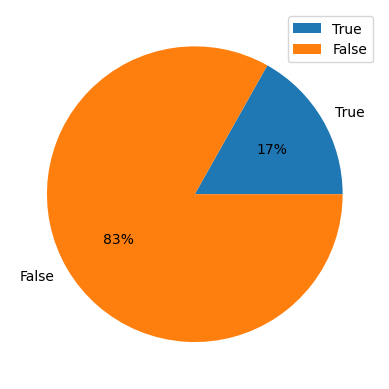

In [24]:
true_labels = customers[customers["Churn"] == 1]['Churn'].count()
false_labels = customers[customers["Churn"] == 0]['Churn'].count()
plt.pie(np.array([true_labels, false_labels]), labels = ["True", "False"], autopct='%1.0f%%')
plt.legend()
plt.show() 

In [25]:
print("True", true_labels)
print("False", false_labels)

True 1517
False 7491


In [26]:
nan_rows = customers[customers.isna().all(axis=1)]
nan_rows.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


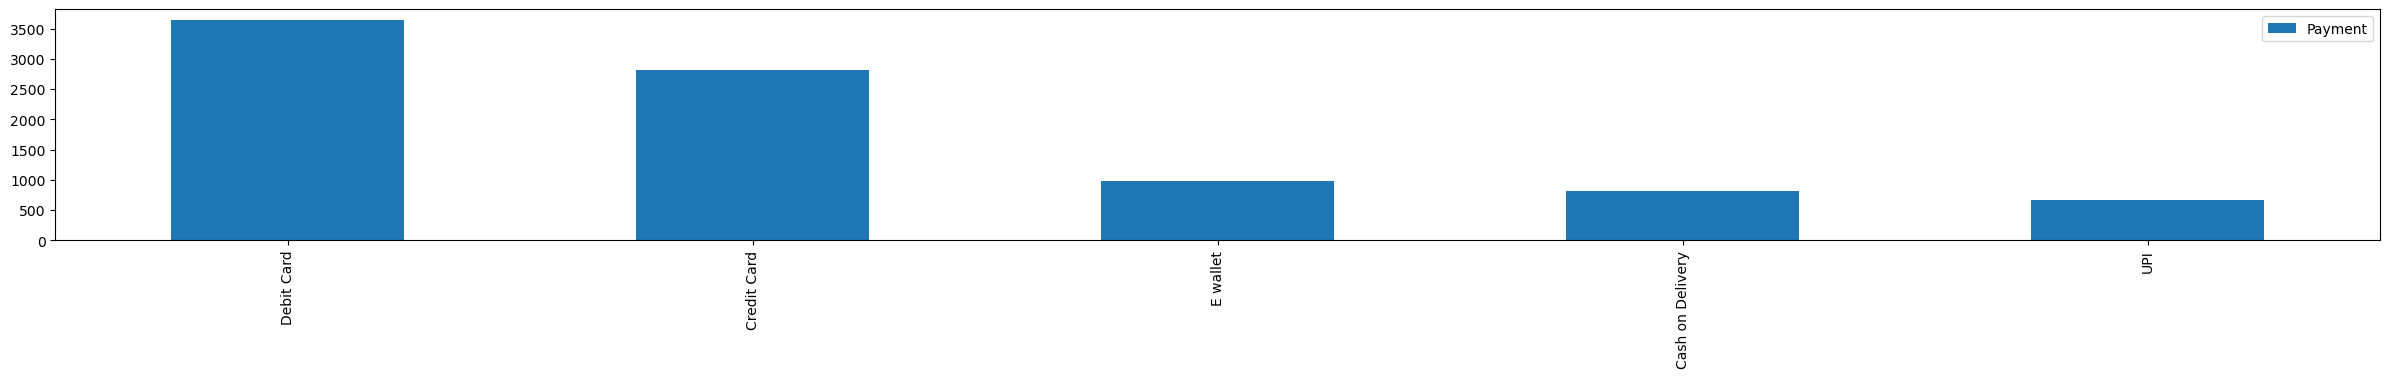

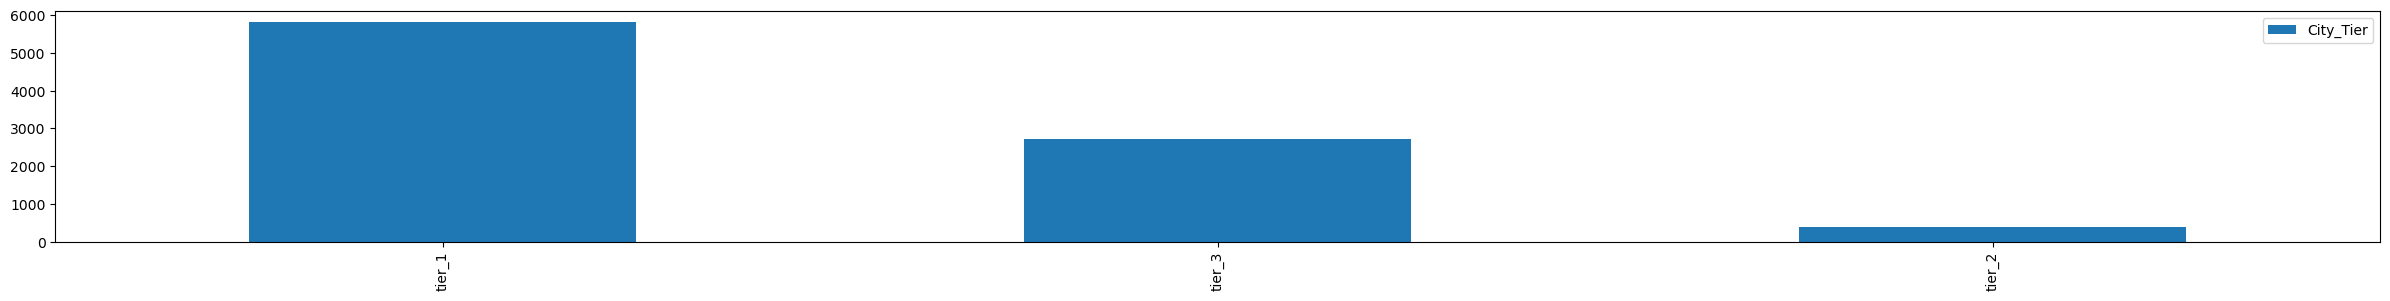

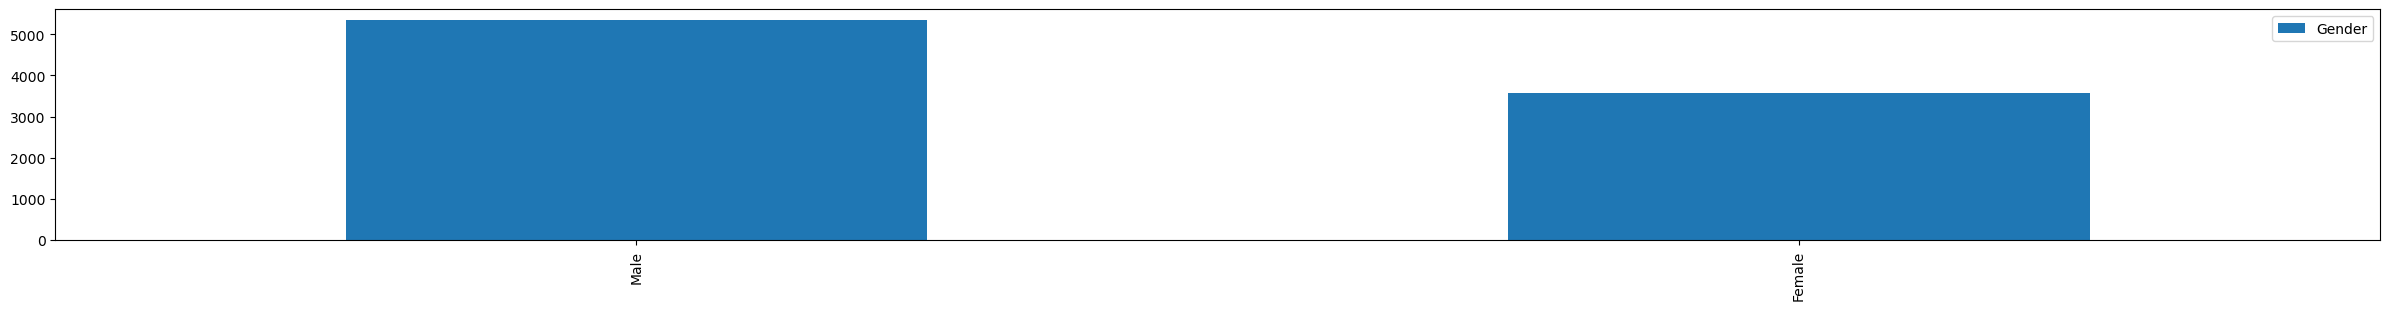

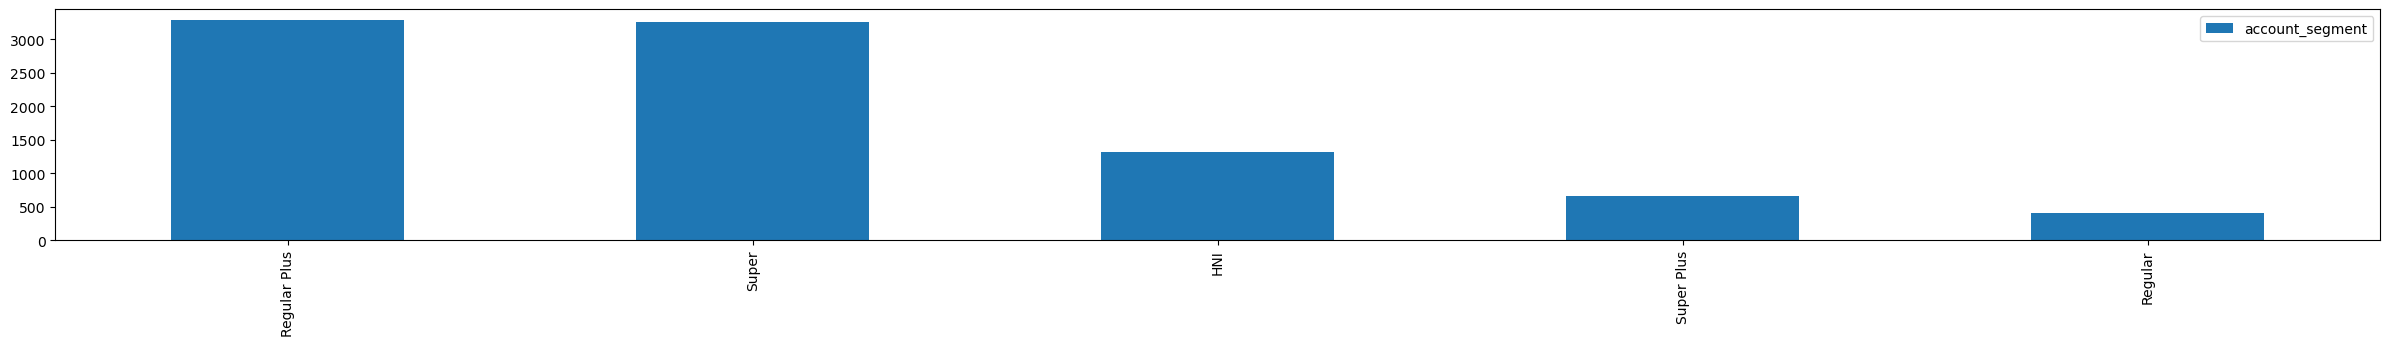

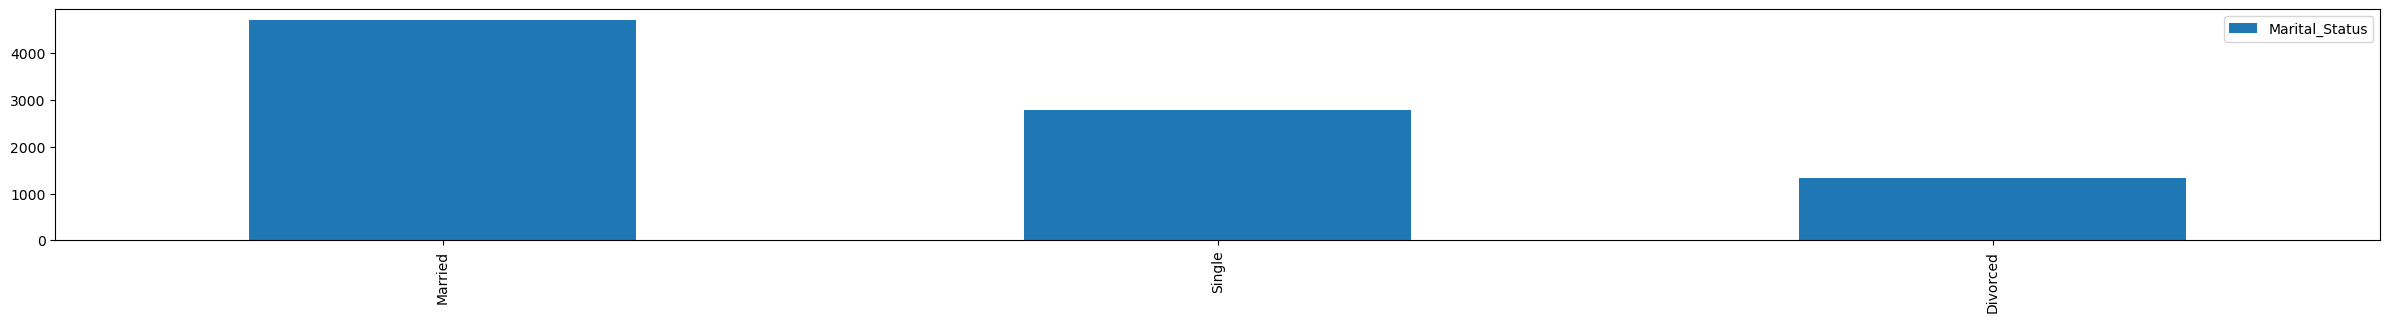

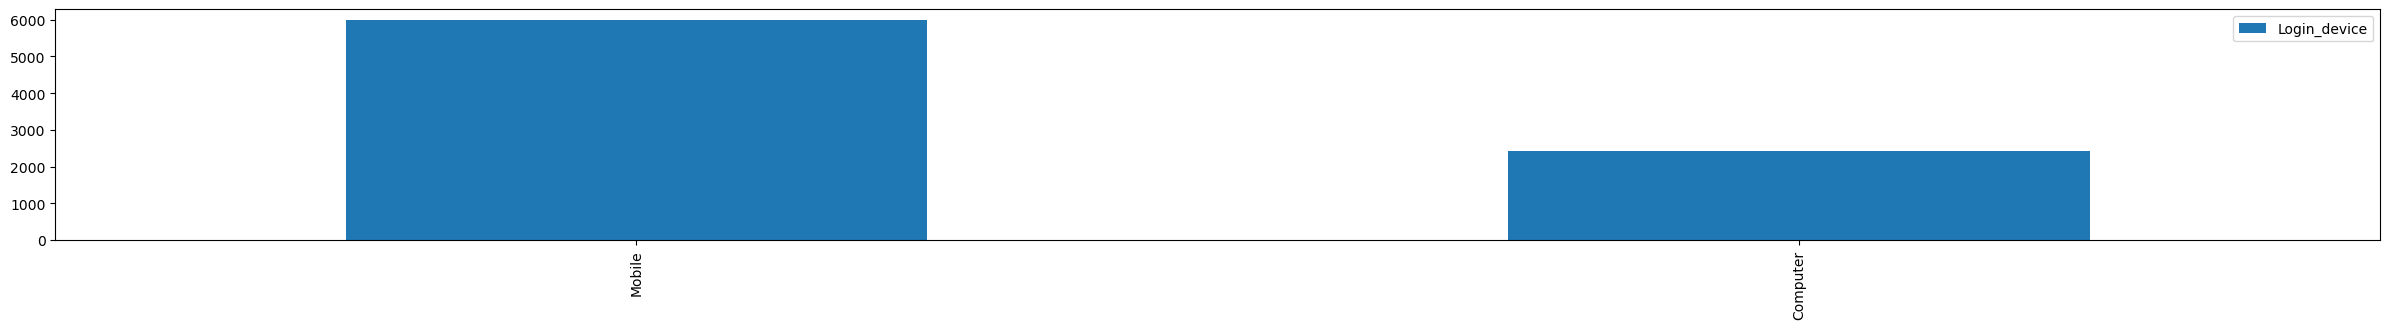

In [27]:
customers['City_Tier'] = customers['City_Tier'].replace([1.0, 2.0, 3.0], ['tier_1', 'tier_2', 'tier_3'])
cat_cols = ['Payment', 'City_Tier', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
num_cols = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count','CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect','cashback']
def _bar_plot(df, feature):
    pd.DataFrame(df[feature].value_counts()).plot(kind='bar', figsize=(30, 3))
for col in cat_cols:
    _bar_plot(customers, col)

In [28]:
def chisquared_test(df: pd.DataFrame, col1: str, col2: str, alpha: float, display: int) -> None:
  from scipy import stats

  cross_table = pd.crosstab(df[col1], df[col2])
  observed_values = cross_table.values

  val = stats.chi2_contingency(cross_table)

  chi2 = val[0]
  ddof = val[2]
  expected_values = val[3]
  critical_value = stats.chi2.ppf(q=alpha, df = ddof)
  if display != 0:
    print('Chi-square statistic: ', chi2)
    print('Degree of freedom: ', ddof)
    print('Significant  level: ', 1 - alpha)
    print('Critical value: ', critical_value )

  if chi2 >= critical_value:
    print('Reject H0, there is a relationship between',col1,'and',col2)
  else: 
    print('Retain H0, there is no relationship between',col1,'and',col2)
  print("------------------")

In [29]:
cat_cols

['Payment',
 'City_Tier',
 'Gender',
 'account_segment',
 'Marital_Status',
 'Login_device']

In [30]:
for col in cat_cols:
    chisquared_test(customers, 'Churn', col, 0.95, 1)

Chi-square statistic:  82.66194736496428
Degree of freedom:  4
Significant  level:  0.050000000000000044
Critical value:  9.487729036781154
Reject H0, there is a relationship between Churn and Payment
------------------
Chi-square statistic:  47.974562859153956
Degree of freedom:  2
Significant  level:  0.050000000000000044
Critical value:  5.991464547107979
Reject H0, there is a relationship between Churn and City_Tier
------------------
Chi-square statistic:  10.141365382074188
Degree of freedom:  1
Significant  level:  0.050000000000000044
Critical value:  3.841458820694124
Reject H0, there is a relationship between Churn and Gender
------------------
Chi-square statistic:  489.4839579910795
Degree of freedom:  4
Significant  level:  0.050000000000000044
Critical value:  9.487729036781154
Reject H0, there is a relationship between Churn and account_segment
------------------
Chi-square statistic:  297.20452308533993
Degree of freedom:  2
Significant  level:  0.050000000000000044
Cri

In [31]:
for i in range(len(cat_cols)-1):
    for j in range(i+1, len(cat_cols)):
        chisquared_test(customers, cat_cols[i], cat_cols[j], 0.95, 1)

Chi-square statistic:  3401.1375402956014
Degree of freedom:  8
Significant  level:  0.050000000000000044
Critical value:  15.50731305586545
Reject H0, there is a relationship between Payment and City_Tier
------------------
Chi-square statistic:  24.89139083028738
Degree of freedom:  4
Significant  level:  0.050000000000000044
Critical value:  9.487729036781154
Reject H0, there is a relationship between Payment and Gender
------------------
Chi-square statistic:  360.6631760118656
Degree of freedom:  16
Significant  level:  0.050000000000000044
Critical value:  26.29622760486423
Reject H0, there is a relationship between Payment and account_segment
------------------
Chi-square statistic:  19.517988419902842
Degree of freedom:  8
Significant  level:  0.050000000000000044
Critical value:  15.50731305586545
Reject H0, there is a relationship between Payment and Marital_Status
------------------
Chi-square statistic:  9.673001678965303
Degree of freedom:  4
Significant  level:  0.0500000

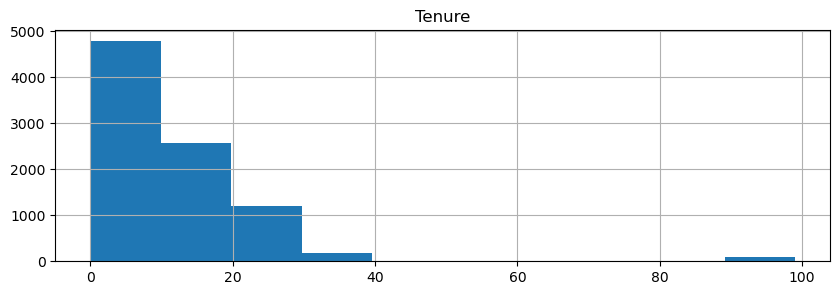

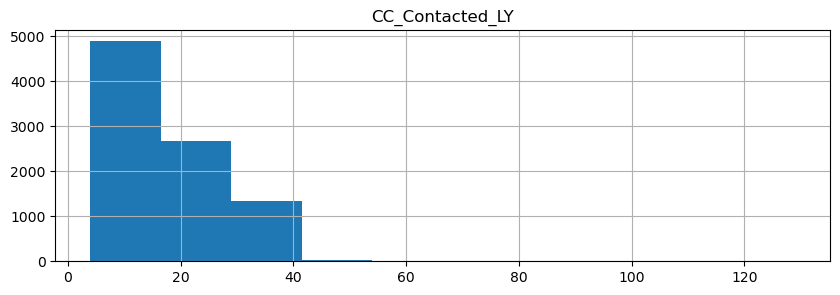

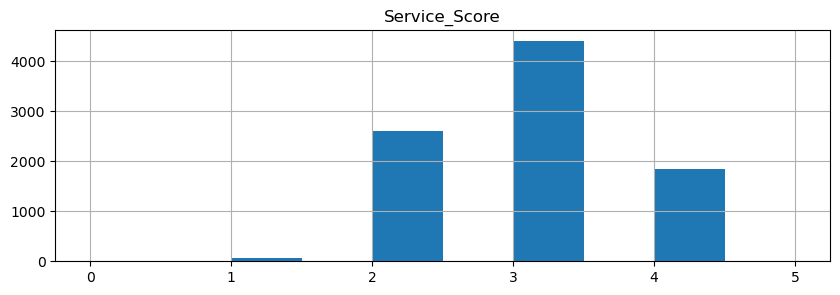

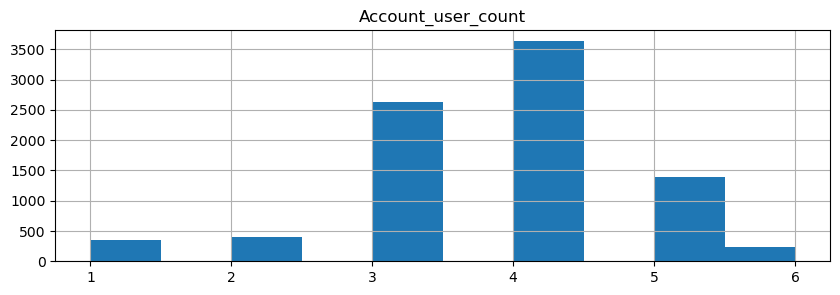

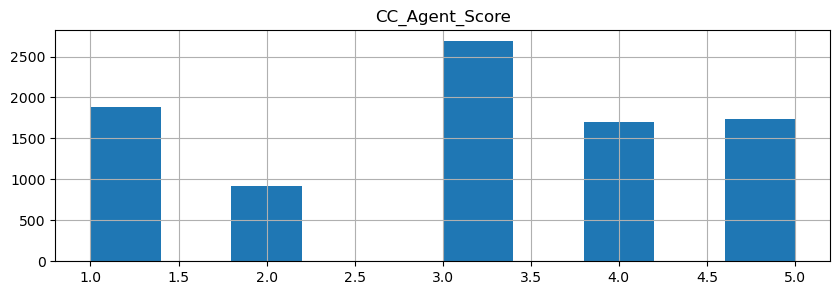

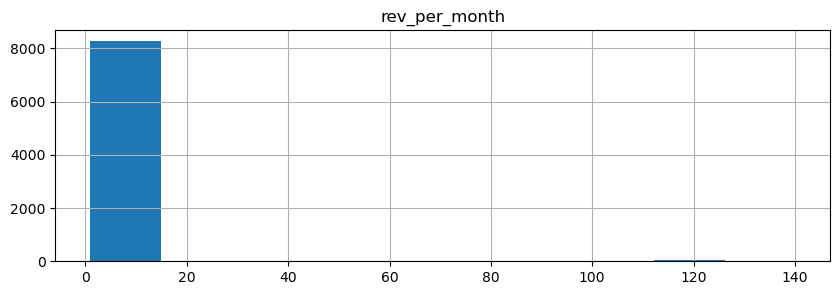

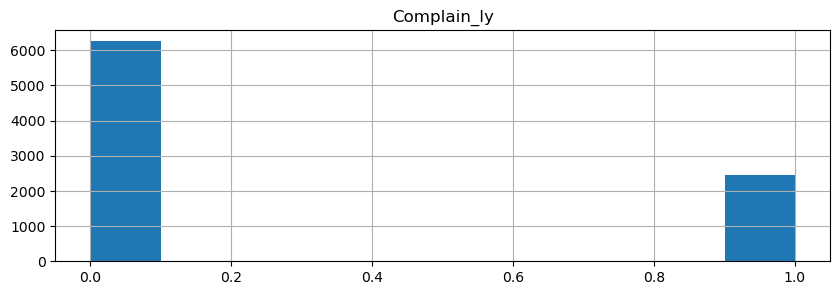

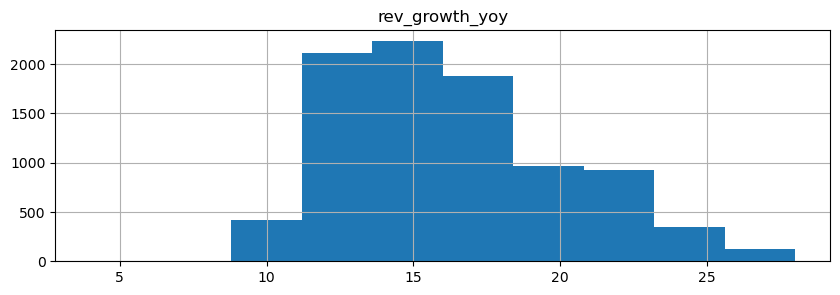

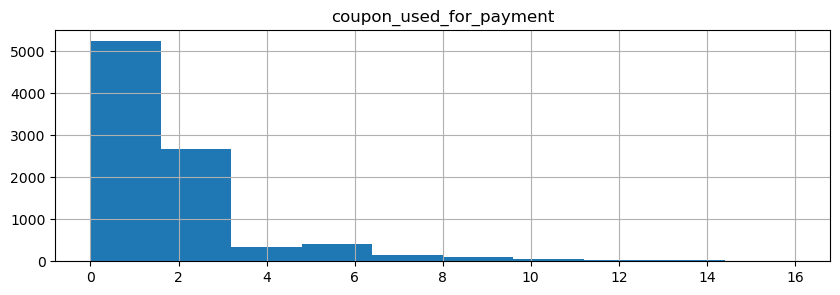

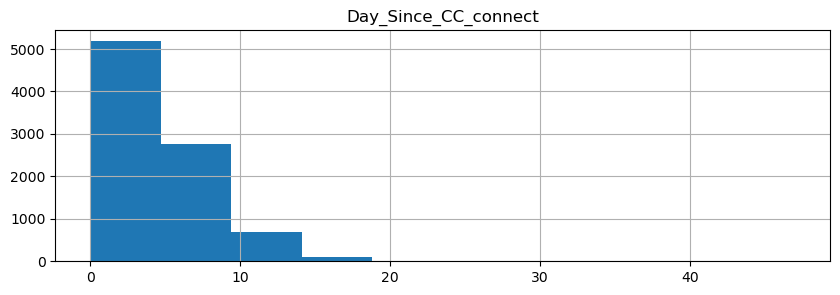

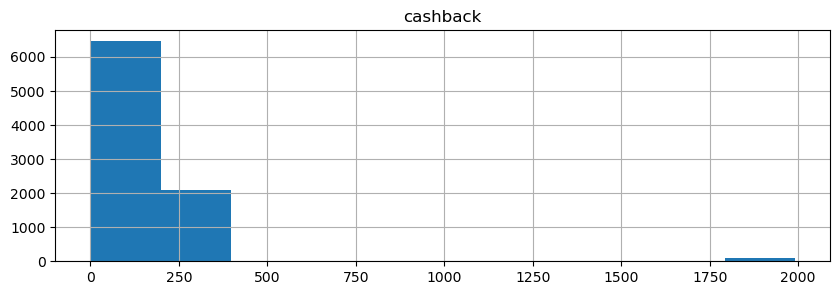

In [32]:
for col in num_cols:
  customers[col].hist(figsize=(10,3) )
  plt.title(col)
  plt.show()

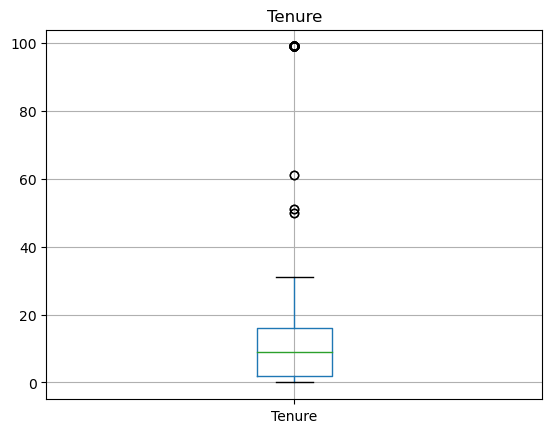

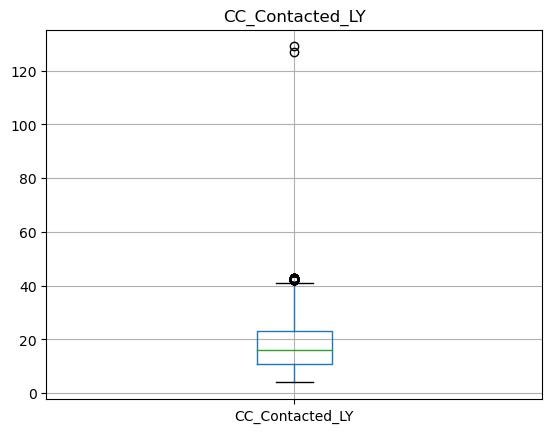

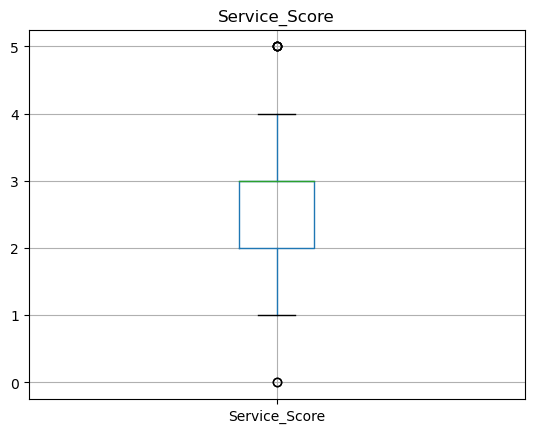

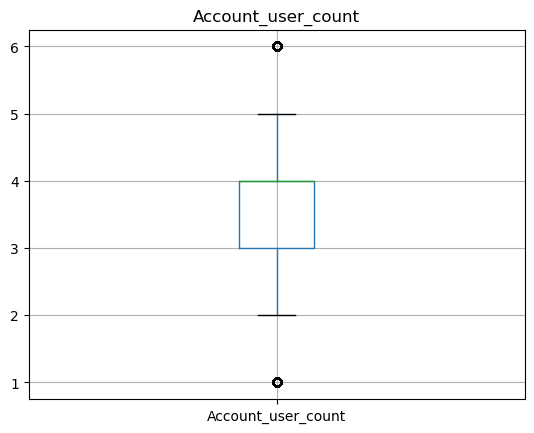

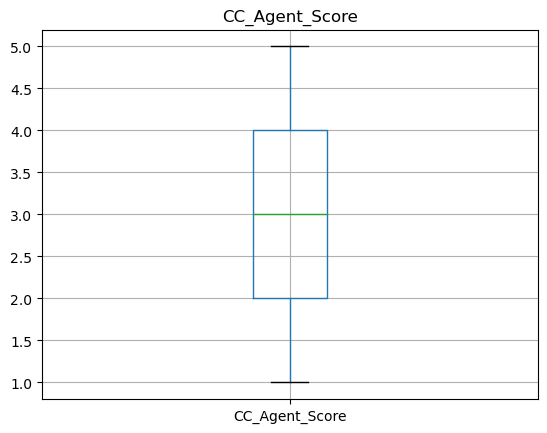

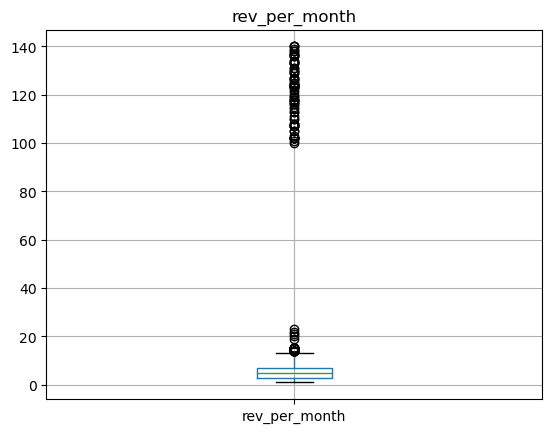

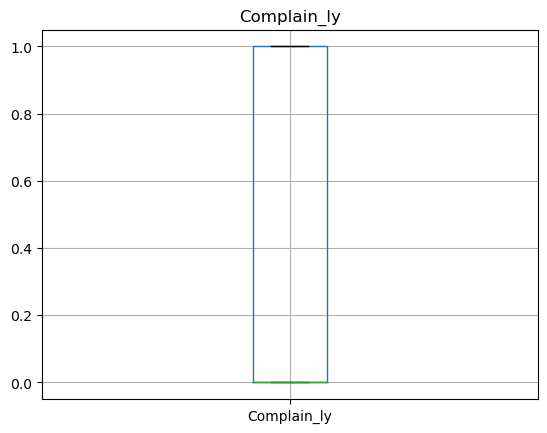

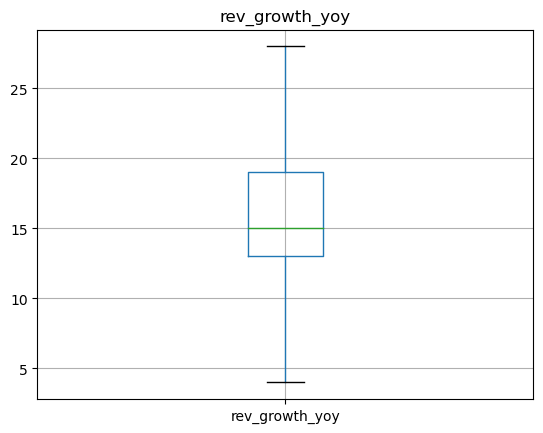

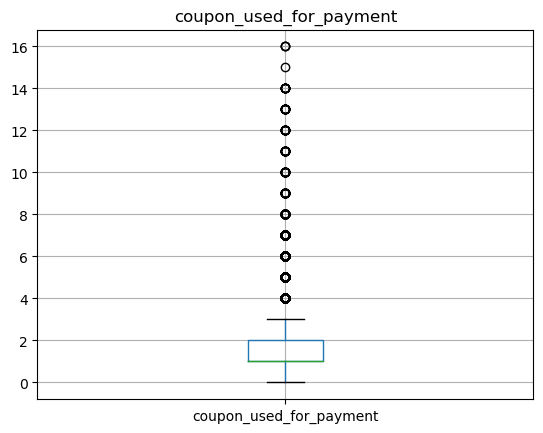

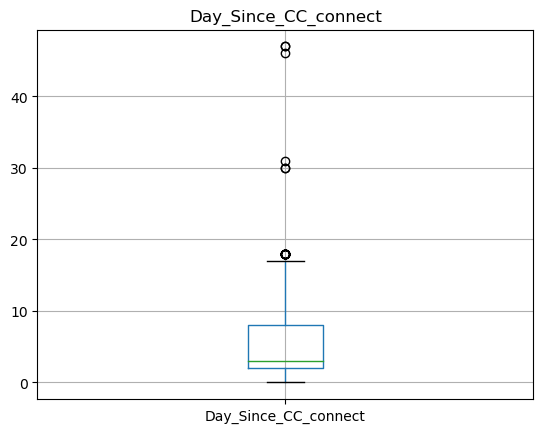

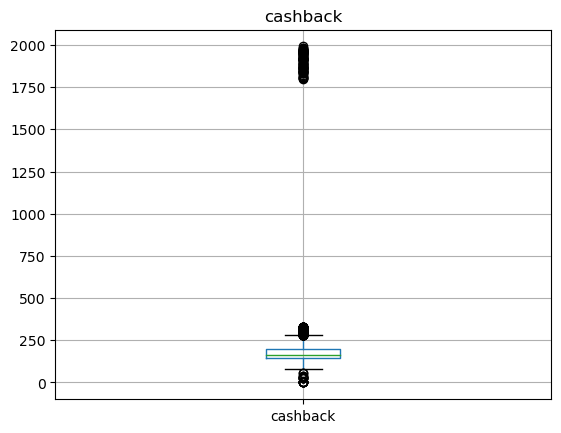

In [33]:
for col in num_cols:
  customers.boxplot(column=[col])
  plt.title(col)
  plt.show()

In [34]:
corr = customers[num_cols].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19088\2059469079.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Tenure,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Tenure,1.00,-0.00,0.01,0.01,-0.02,0.04,-0.02,0.02,0.10,0.13,0.08
CC_Contacted_LY,-0.00,1.00,0.05,0.02,0.00,0.01,0.02,0.07,-0.00,0.01,0.00
Service_Score,0.01,0.05,1.00,0.33,0.04,0.03,-0.00,0.10,0.18,0.10,0.05
Account_user_count,0.01,0.02,0.33,1.00,-0.01,0.03,0.00,0.06,0.15,0.04,0.04
CC_Agent_Score,-0.02,0.00,0.04,-0.01,1.00,0.02,-0.03,-0.02,0.03,0.02,-0.01
rev_per_month,0.04,0.01,0.03,0.03,0.02,1.00,0.01,0.02,0.02,-0.00,0.00
Complain_ly,-0.02,0.02,-0.00,0.00,-0.03,0.01,1.00,-0.00,-0.01,-0.04,0.01
rev_growth_yoy,0.02,0.07,0.10,0.06,-0.02,0.02,-0.00,1.00,0.02,0.00,-0.00
coupon_used_for_payment,0.10,-0.00,0.18,0.15,0.03,0.02,-0.01,0.02,1.00,0.36,0.08
Day_Since_CC_connect,0.13,0.01,0.10,0.04,0.02,-0.00,-0.04,0.00,0.36,1.00,0.09


In [35]:
for col in num_cols:
    mean = customers[col].mean()
    std = customers[col].std()
    threshold = 3
    print('outlier in',col,'is\n', customers[(customers[col] - mean)/std > threshold][col].describe())
    

outlier in Tenure is
 count    109.000000
mean      96.522936
std       10.376787
min       50.000000
25%       99.000000
50%       99.000000
75%       99.000000
max       99.000000
Name: Tenure, dtype: float64
outlier in CC_Contacted_LY is
 count      2.000000
mean     128.000000
std        1.414214
min      127.000000
25%      127.500000
50%      128.000000
75%      128.500000
max      129.000000
Name: CC_Contacted_LY, dtype: float64
outlier in Service_Score is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Service_Score, dtype: float64
outlier in Account_user_count is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Account_user_count, dtype: float64
outlier in CC_Agent_Score is
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CC_Agent_Score, dtype: float64
outlier in rev_per_month is
 count     81

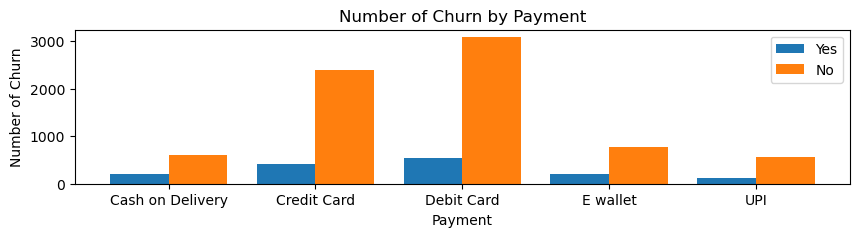

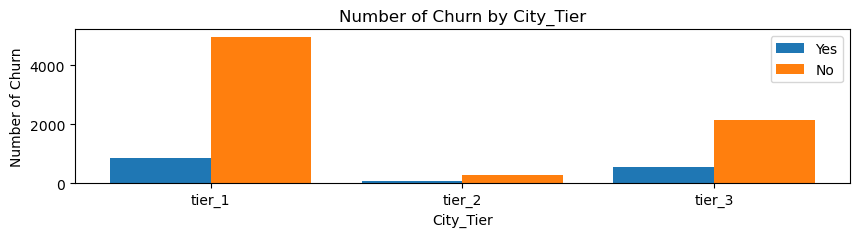

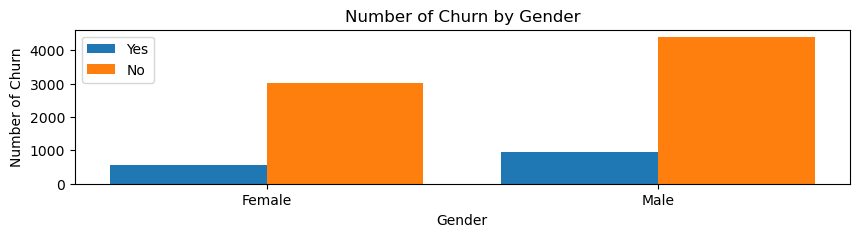

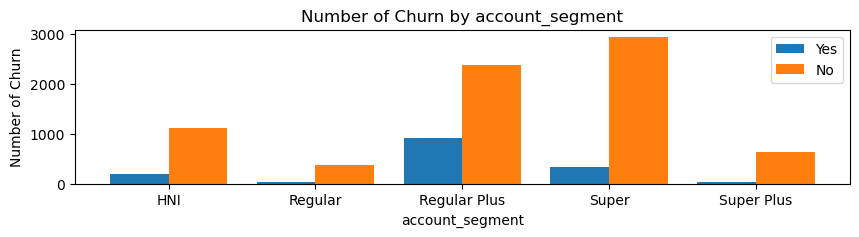

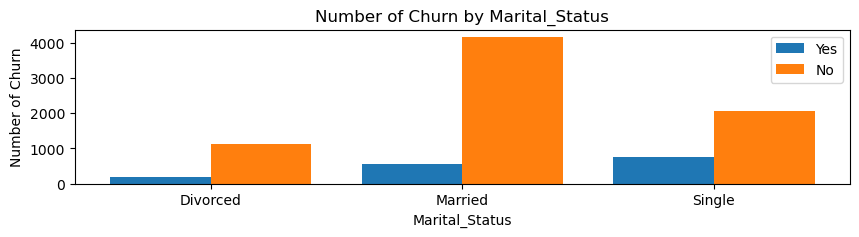

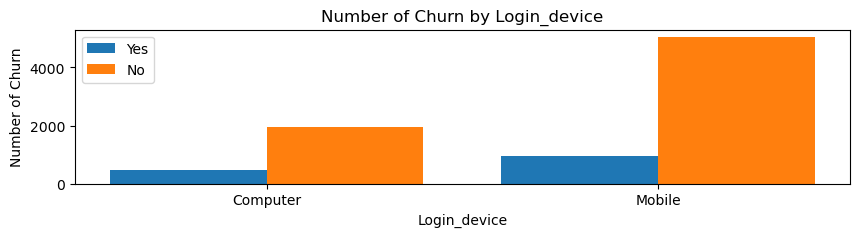

In [36]:
def bar_plot(df, feature, target = 'Churn'):
    temp_df = pd.DataFrame(df.groupby(feature).agg(
        Yes = (target, lambda x: sum(x == 1)),
        No = (target, lambda x: sum(x == 0))
        )
    )

    temp_df = temp_df.reset_index()

    X_axis = np.arange(len(temp_df[feature]))

    plt.figure(figsize=(10,2))
    plt.bar(X_axis - 0.2, temp_df['Yes'], 0.4, label = 'Yes')
    plt.bar(X_axis + 0.2, temp_df['No'], 0.4, label = 'No')
    
    plt.xticks(X_axis, temp_df[feature])
    plt.xlabel(feature)
    plt.ylabel("Number of " + target)
    plt.title("Number of " + target + " by " + feature)
    plt.legend()
    plt.show()
for col in cat_cols:
    bar_plot(customers, col)